<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Brain Tumor Prediction <br>
    (EDA / ML, DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Brain Tumor Prediction (Classification)</div>**


## Goal
> ## EDA : Column Analysis
> ## Modeling : Predicting Brain_Tumor_Present

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/kaggle/input/brain-tumor-prediction-dataset/Brain_Tumor_Prediction_Dataset.csv')
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Blood_Pressure       250000 non-null  object 
 13  Diabetes             250000 non-null  object 
 14  Tumor_Type           250000 non-null  object 
 15  Treatment_Receive

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,250000.0,46.962424,24.517143,5.0,26.00,47.00,68.00,89.0
Tumor_Size,250000.0,5.251768,2.742576,0.5,2.87,5.26,7.63,10.0
Genetic_Risk,250000.0,49.998916,29.178031,0.0,25.00,50.00,75.00,100.0
Survival_Rate(%),250000.0,54.481532,25.999932,10.0,32.00,55.00,77.00,99.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Gender,250000,3,Male,83407
Country,250000,12,Brazil,20985
Tumor_Location,250000,5,Parietal,50187
MRI_Findings,250000,3,Abnormal,83737
Smoking_History,250000,2,Yes,125150
Alcohol_Consumption,250000,2,Yes,125173
Radiation_Exposure,250000,3,Low,83513
Head_Injury_History,250000,2,Yes,125029
Chronic_Illness,250000,2,Yes,125321
Blood_Pressure,250000,5551,117/106,70


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
df['Blood_Pressure'].unique()

array(['122/88', '126/119', '118/65', ..., '180/63', '105/80', '155/69'],
      dtype=object)

In [7]:
df[['High_BP', 'Low_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)
df.drop('Blood_Pressure', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings         250000 non-null  object 
 6   Genetic_Risk         250000 non-null  int64  
 7   Smoking_History      250000 non-null  object 
 8   Alcohol_Consumption  250000 non-null  object 
 9   Radiation_Exposure   250000 non-null  object 
 10  Head_Injury_History  250000 non-null  object 
 11  Chronic_Illness      250000 non-null  object 
 12  Diabetes             250000 non-null  object 
 13  Tumor_Type           250000 non-null  object 
 14  Treatment_Received   187252 non-null  object 
 15  Survival_Rate(%) 

In [8]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                     0.0000
Gender                  0.0000
Country                 0.0000
Tumor_Size              0.0000
Tumor_Location          0.0000
MRI_Findings            0.0000
Genetic_Risk            0.0000
Smoking_History         0.0000
Alcohol_Consumption     0.0000
Radiation_Exposure      0.0000
Head_Injury_History     0.0000
Chronic_Illness         0.0000
Diabetes                0.0000
Tumor_Type              0.0000
Treatment_Received     25.0992
Survival_Rate(%)        0.0000
Tumor_Growth_Rate       0.0000
Family_History          0.0000
Symptom_Severity        0.0000
Brain_Tumor_Present     0.0000
High_BP                 0.0000
Low_BP                  0.0000
dtype: float64

Duplicate Rows (%):
0.0


In [9]:
df['Treatment_Received'].unique()

array([nan, 'Chemotherapy', 'Radiation', 'Surgery'], dtype=object)

In [10]:
df['Treatment_Received'] = df['Treatment_Received'].fillna('No')
df['Treatment_Received'].unique()

array(['No', 'Chemotherapy', 'Radiation', 'Surgery'], dtype=object)

In [11]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

Missing Value (%)
Age                    0.0
Gender                 0.0
Country                0.0
Tumor_Size             0.0
Tumor_Location         0.0
MRI_Findings           0.0
Genetic_Risk           0.0
Smoking_History        0.0
Alcohol_Consumption    0.0
Radiation_Exposure     0.0
Head_Injury_History    0.0
Chronic_Illness        0.0
Diabetes               0.0
Tumor_Type             0.0
Treatment_Received     0.0
Survival_Rate(%)       0.0
Tumor_Growth_Rate      0.0
Family_History         0.0
Symptom_Severity       0.0
Brain_Tumor_Present    0.0
High_BP                0.0
Low_BP                 0.0
dtype: float64


In [12]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

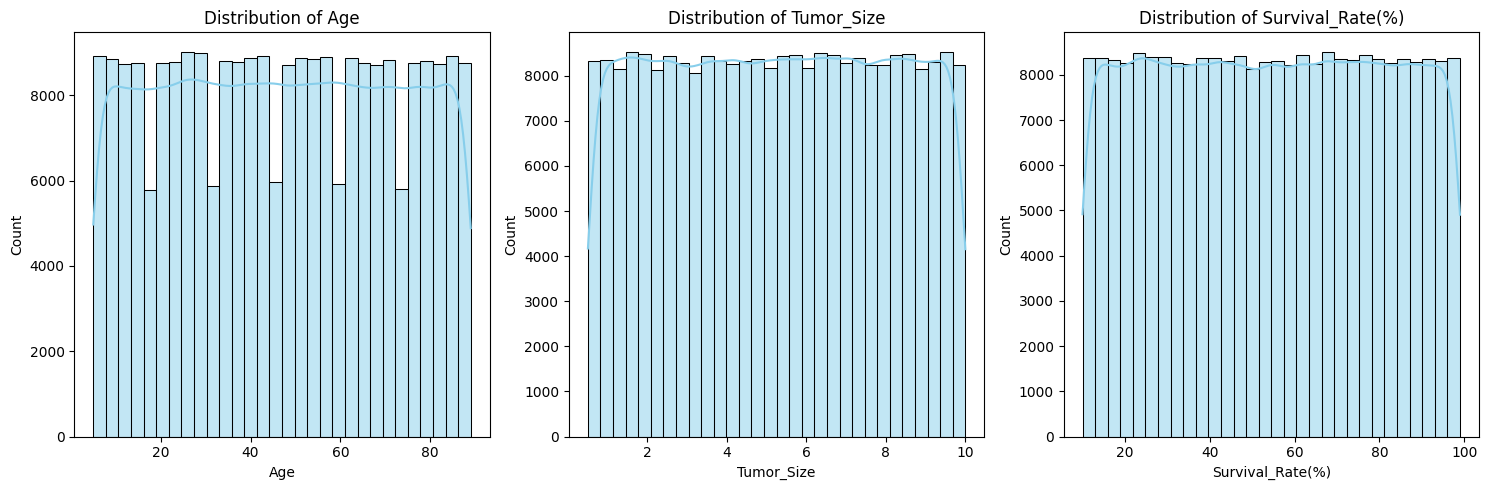

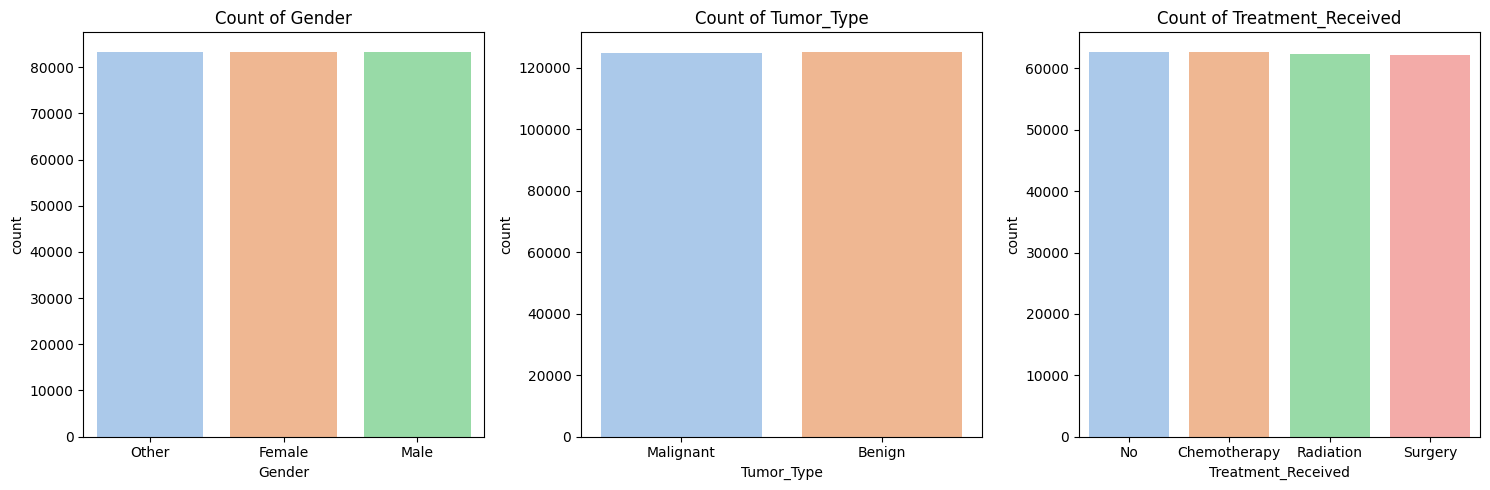

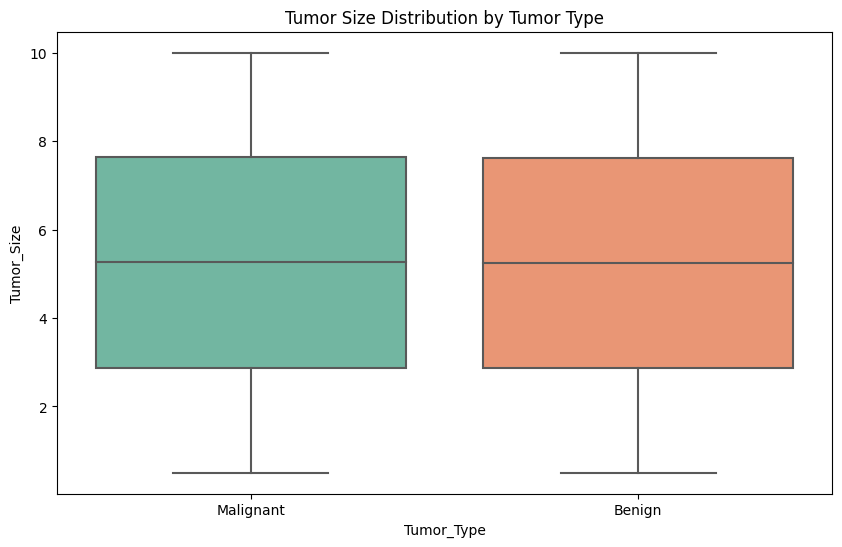

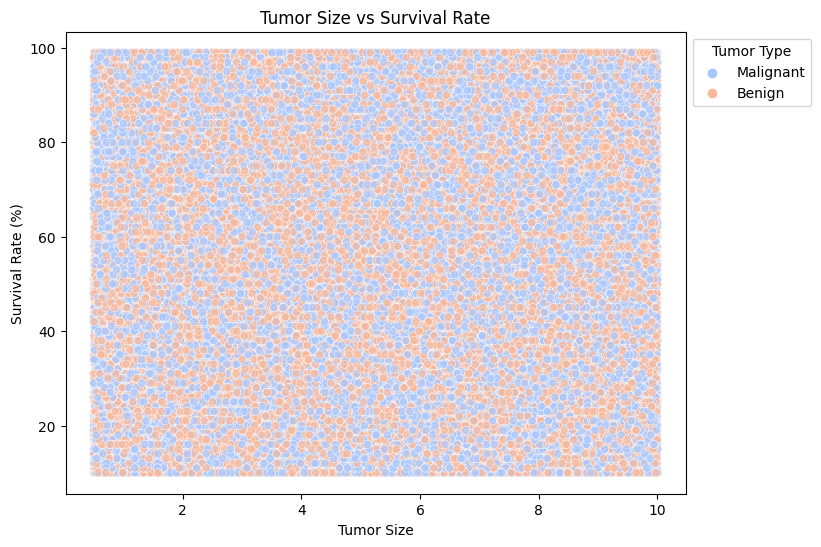

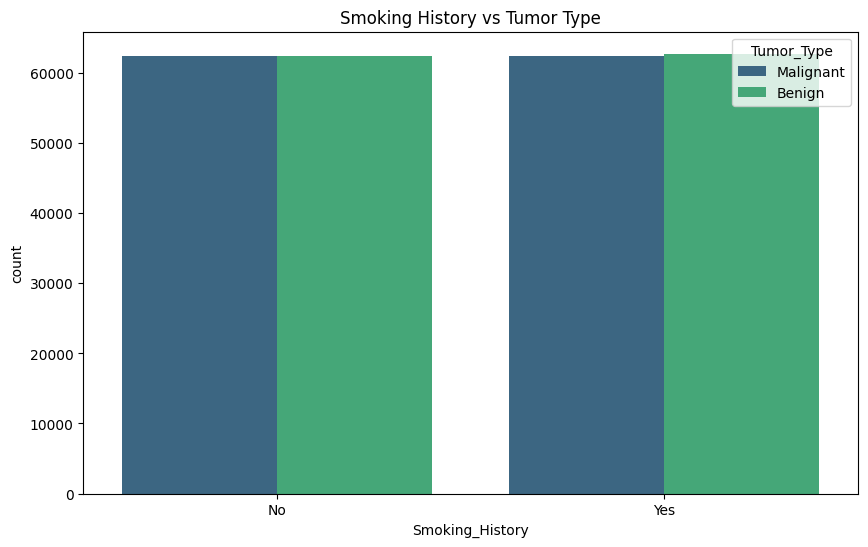

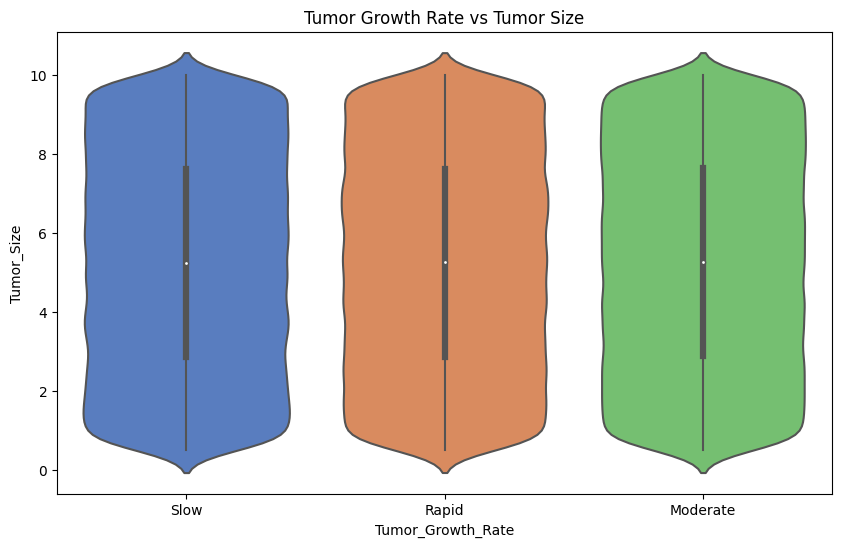

In [13]:
### 1. Histogram of Numerical Features ###
numerical_cols = ['Age', 'Tumor_Size', 'Survival_Rate(%)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### 2. Count Plot for Categorical Features ###
categorical_cols = ['Gender', 'Tumor_Type', 'Treatment_Received']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

### 3. Box Plot: Tumor Size by Tumor Type ###
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Tumor_Type', y='Tumor_Size', palette="Set2")
plt.title("Tumor Size Distribution by Tumor Type")
plt.xticks(rotation=0)
plt.show()

### 4. Scatter Plot: Tumor Size vs Survival Rate ###
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Tumor_Size', y='Survival_Rate(%)', hue='Tumor_Type', palette='coolwarm', alpha=0.7)
plt.title("Tumor Size vs Survival Rate")
plt.xlabel("Tumor Size")
plt.ylabel("Survival Rate (%)")
plt.legend(title="Tumor Type", bbox_to_anchor=(1, 1))
plt.show()

### 5. Bar Plot: Smoking History vs Tumor Type ###
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Smoking_History', hue='Tumor_Type', palette='viridis')
plt.title("Smoking History vs Tumor Type")
plt.xticks(rotation=0)
plt.show()

### 6. Violin Plot: Tumor Growth Rate vs Tumor Size ###
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Tumor_Growth_Rate', y='Tumor_Size', palette="muted")
plt.title("Tumor Growth Rate vs Tumor Size")
plt.xticks(rotation=0)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

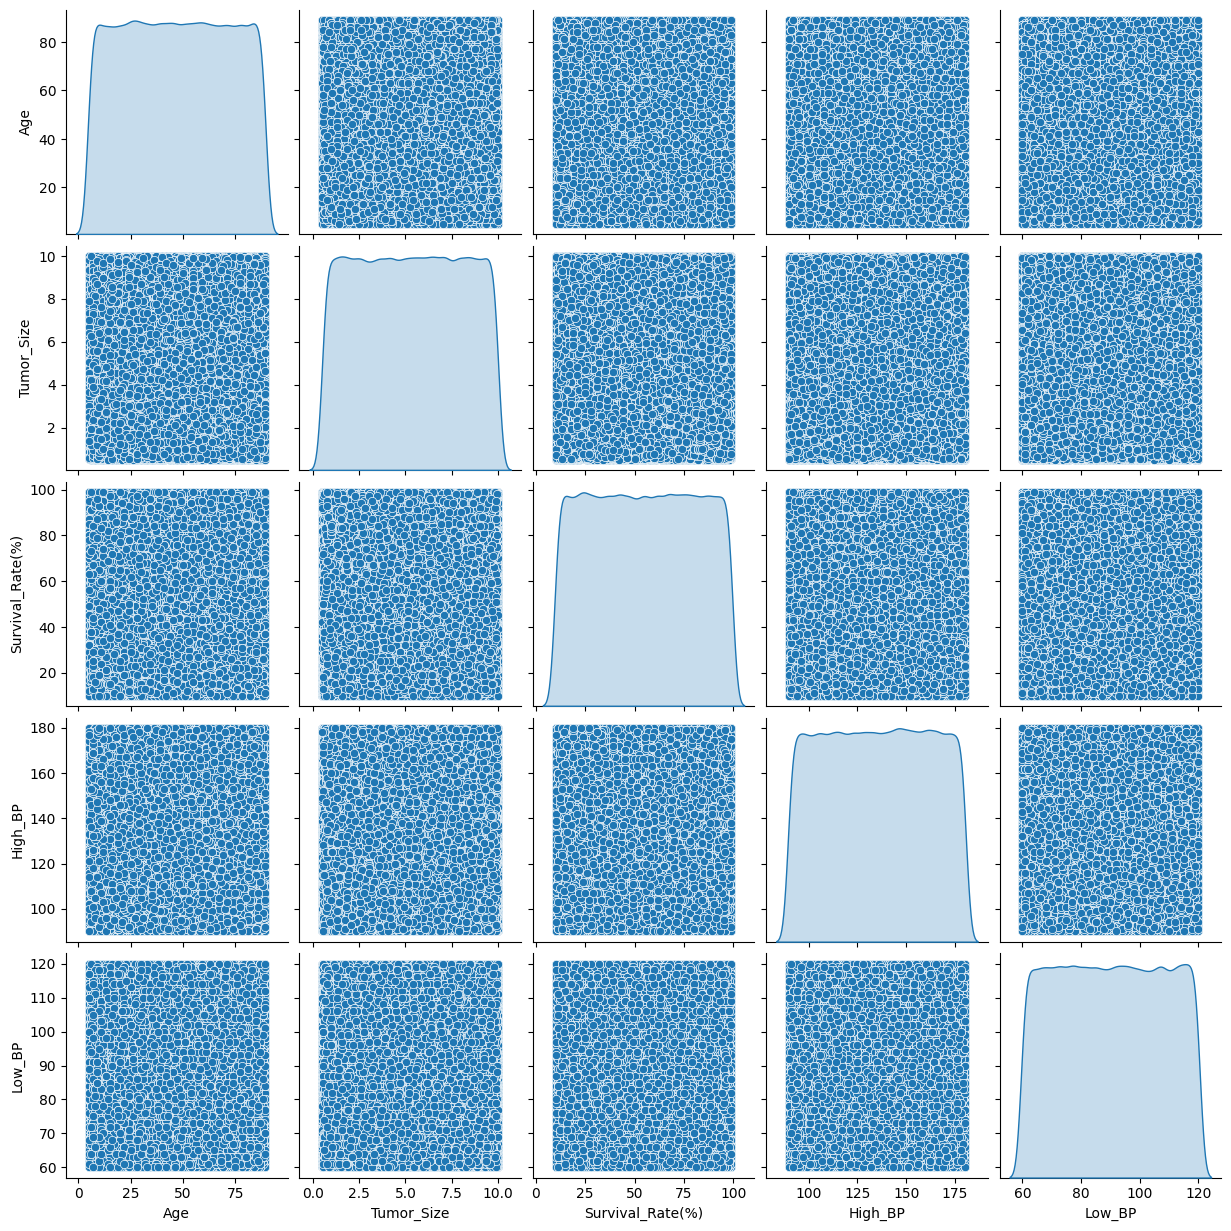

In [14]:
sns.pairplot(df[['Age', 'Tumor_Size', 'Survival_Rate(%)', 'High_BP', 'Low_BP']], diag_kind="kde")
plt.show()

In [15]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:  
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

original_object_cols = list(label_encoders.keys()) 
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns_to_scale = [col for col in num_columns if col not in original_object_cols and col != 'Brain_Tumor_Present']

scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])

print("Scaled Numerical Data:")
df[num_columns_to_scale].head()

Scaled Numerical Data:


,Age,Tumor_Size,Genetic_Risk,Survival_Rate(%),High_BP,Low_BP
0,0.776502,1.257299,1.062482,0.135326,-0.498807,-0.115998
1,1.633047,1.053111,0.514124,-1.595451,-0.346283,1.644008
2,-0.243195,0.280114,1.713659,0.481482,-0.651331,-1.421808
3,0.205472,0.732244,-1.062408,1.173793,1.140824,1.644008
4,1.510684,0.980187,-0.102780,-1.441604,0.797646,0.394972


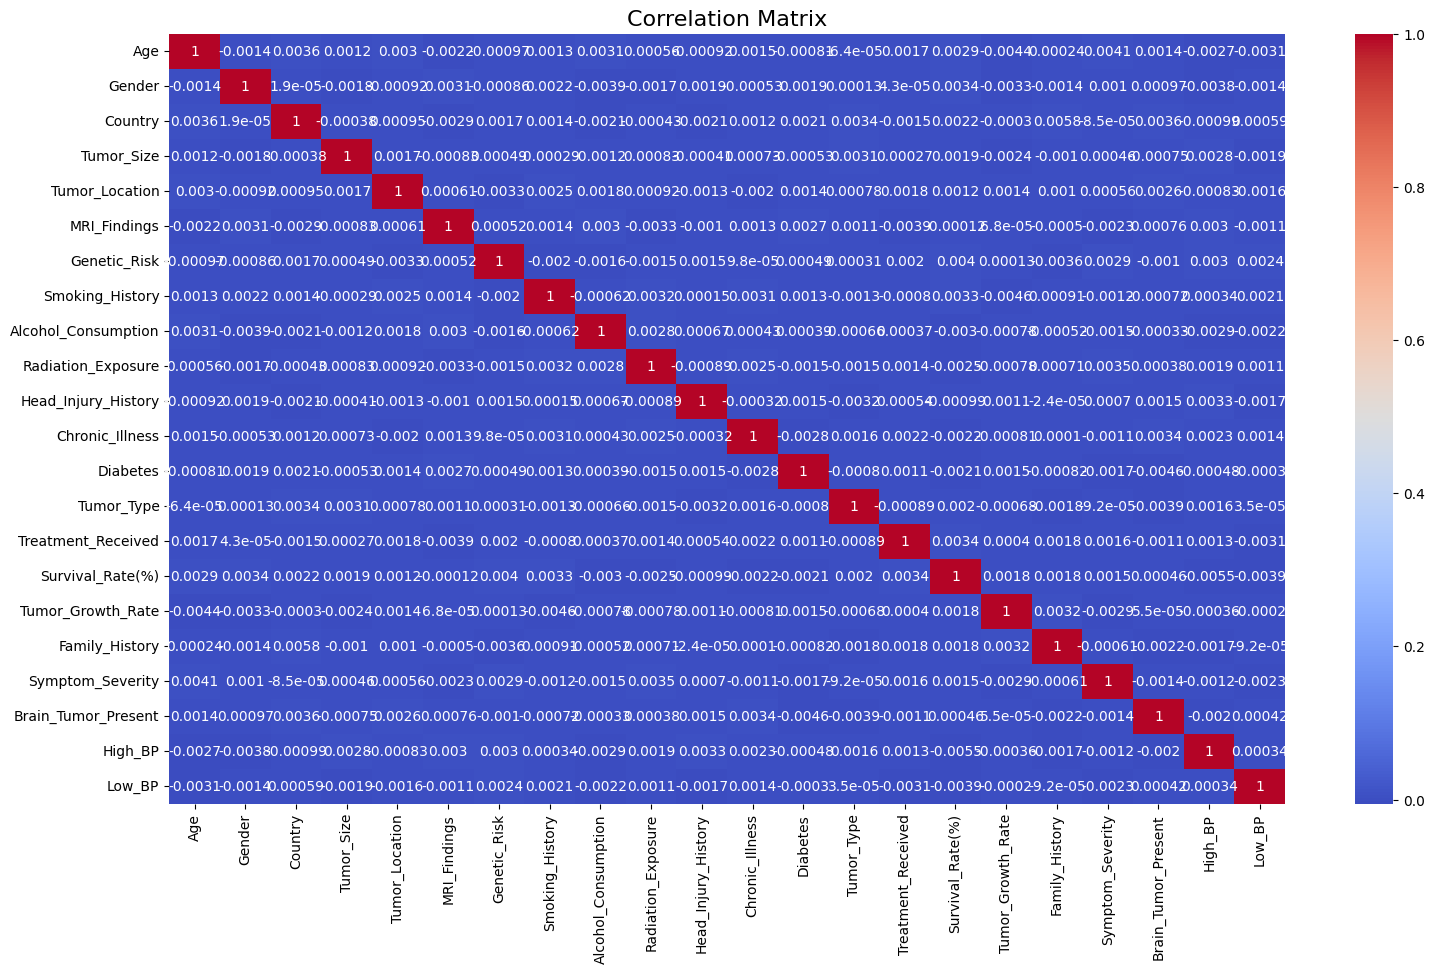

In [16]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Since the correlation is close to zero, the prediction performance is expected to be poor.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [17]:
X = df.drop('Brain_Tumor_Present', axis=1)
y = df['Brain_Tumor_Present'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [18]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.50134,0.501305,0.50134,0.500646
1,KNN,0.49932,0.499318,0.49932,0.499318
2,Decision Tree,0.49734,0.497341,0.49734,0.497340
3,XGBoost,0.49764,0.497629,0.49764,0.497598


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [19]:
def plot_history(history, main_title):
    plt.figure(figsize=(12, 5))

    plt.suptitle(main_title, fontsize=20, fontweight='bold')

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.92]) 
    plt.show()

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,           
    restore_best_weights=True  
)

In [20]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5015 - loss: 0.6970 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5020 - loss: 0.6931 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5018 - loss: 0.6930 - val_accuracy: 0.5003 - val_loss: 0.6933
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5022 - loss: 0.6929 - val_accuracy: 0.5001 - val_loss: 0.6936
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5029 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.5006


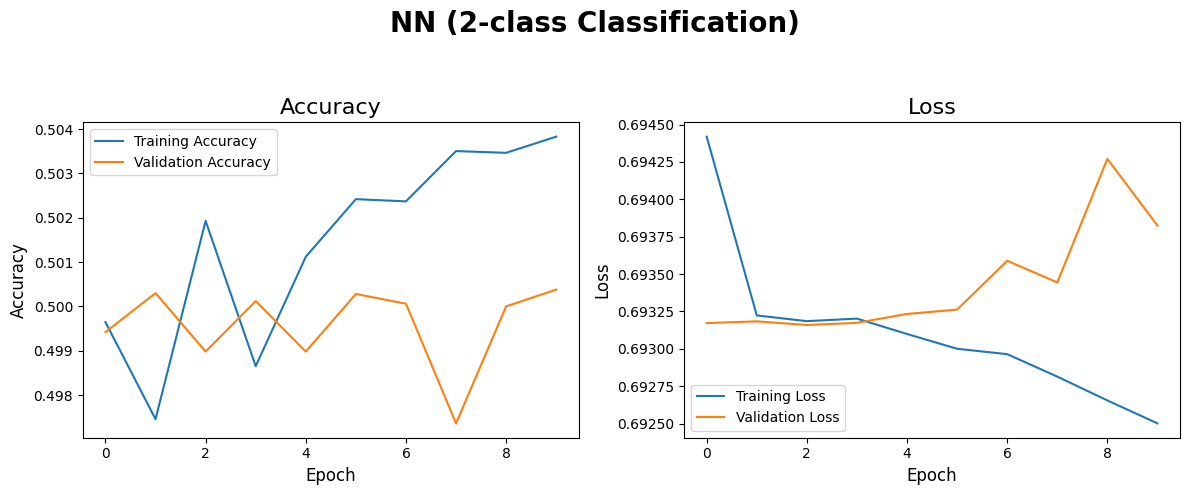

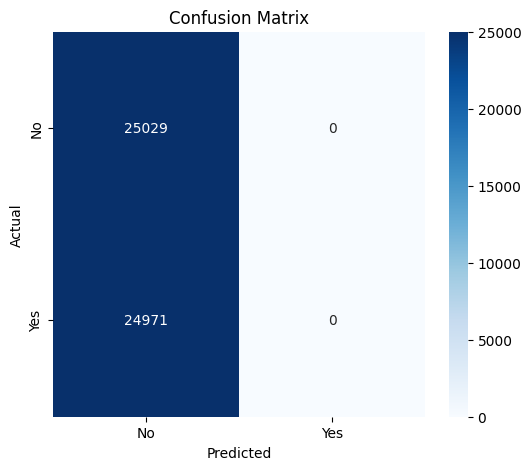

In [21]:
y_pred = simple_nn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "NN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# DNN Model 
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

history = dnn_model.fit(
    X_train, y_train,  
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5004 - loss: 0.7155 - val_accuracy: 0.4998 - val_loss: 0.6934
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5010 - loss: 0.6936 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4962 - loss: 0.6934 - val_accuracy: 0.5015 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6933
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5011 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.5006


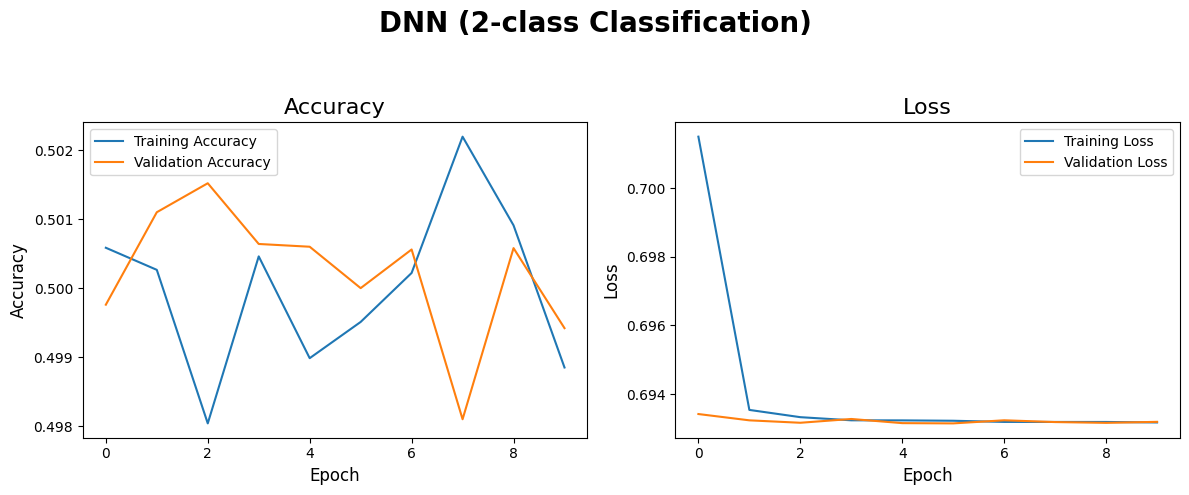

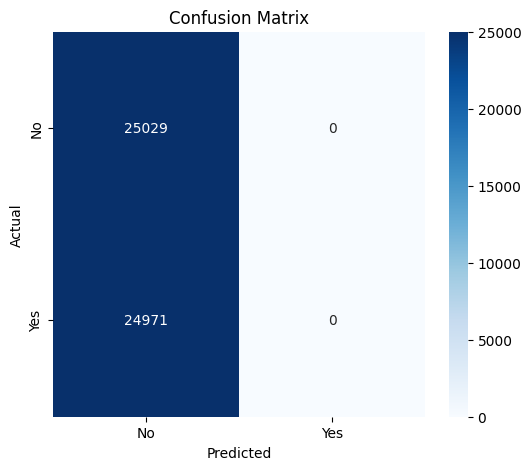

In [23]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "DNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.summary()

history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.4993 - loss: 0.6973 - val_accuracy: 0.4998 - val_loss: 0.6935
Epoch 2/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 3/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5028 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 5/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 6/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 7/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 8/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.5006


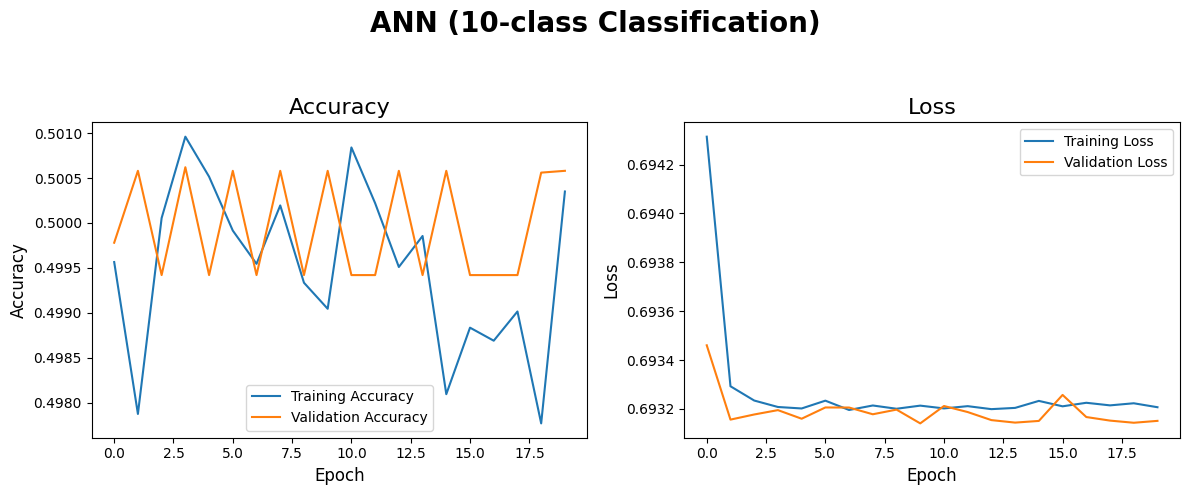

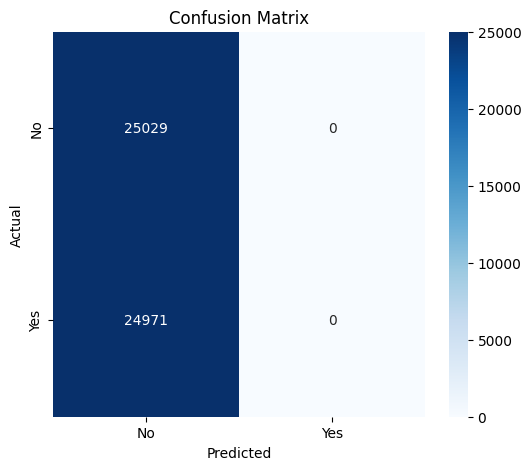

In [25]:
y_pred = ann_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "ANN (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5004 - loss: 0.6983 - val_accuracy: 0.4989 - val_loss: 0.6933
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5022 - loss: 0.6933 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.4993 - val_loss: 0.6932
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.4992 - val_loss: 0.6932
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5014 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.5006


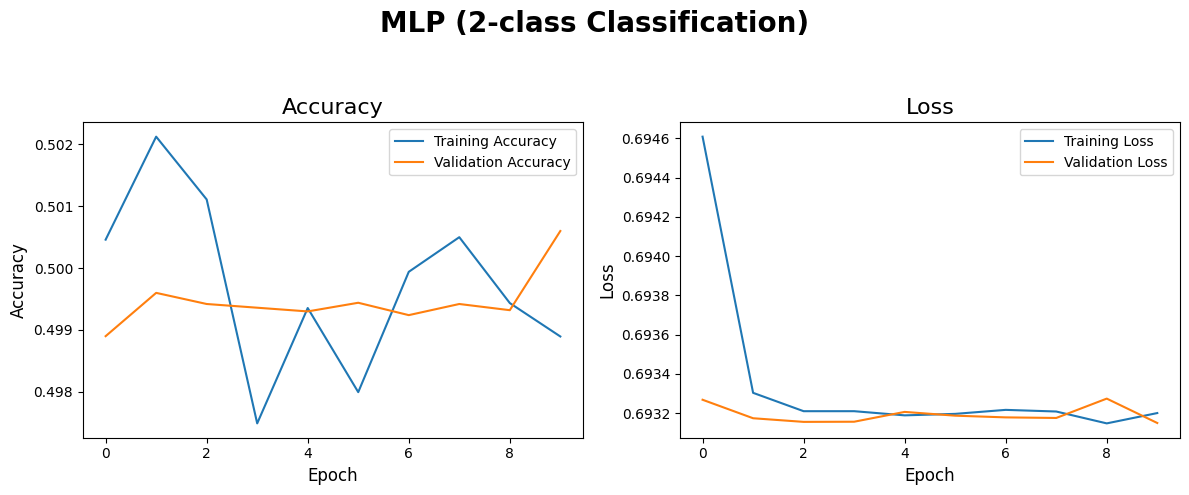

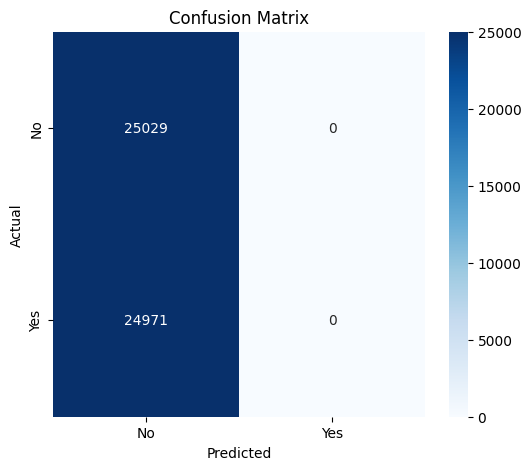

In [27]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "MLP (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))  
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,  
    epochs=10,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 19, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4997 - loss: 0.6950 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4997 - loss: 0.6933 - val_accuracy: 0.4994 - val_loss: 0.6933
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.5007 - val_loss: 0.6932
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6934
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.5001 - val_loss: 0.6933
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5026 - loss: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.5006


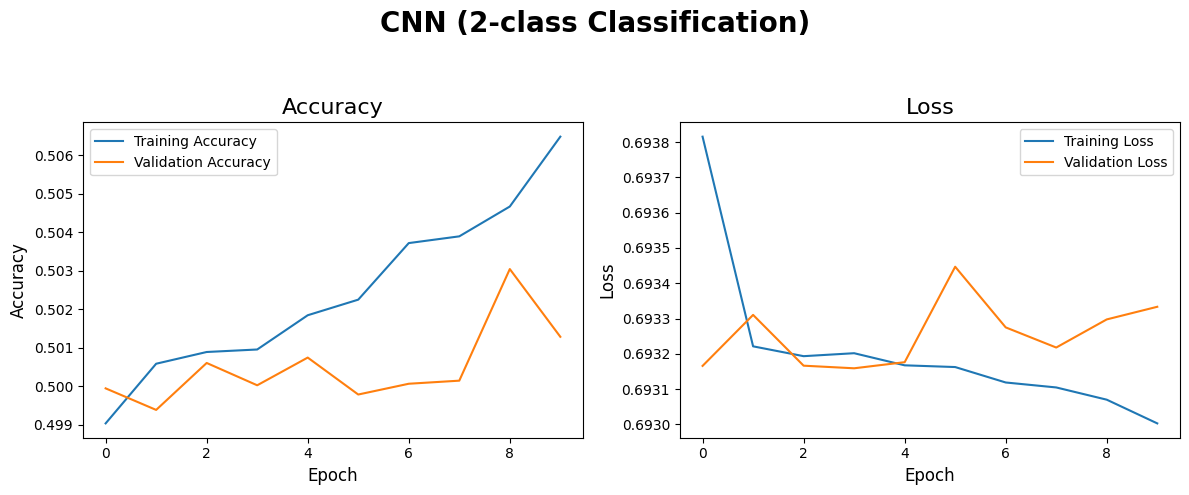

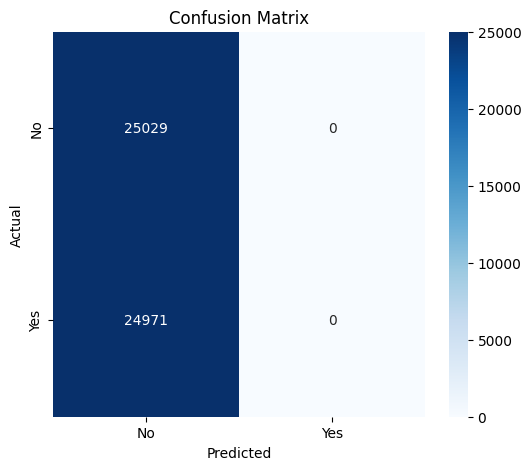

In [29]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "CNN (2-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'],  
            yticklabels=['No', 'Yes'])  

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
def evaluate_model_on_test(model, X_test, y_test):
    if len(X_test.shape) == 2:  
        X_test_input = X_test
    else: 
        X_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    y_pred_prob = model.predict(X_test_input, verbose=0)

    y_pred = np.argmax(y_pred_prob, axis=1)  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "DNN" : dnn_model,
    "ANN" : ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

for model_name, model in models_dict.items():
    acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)
results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.50058,0.25058,0.50058,0.333978
1,DNN,0.50058,0.25058,0.50058,0.333978
2,ANN,0.50058,0.25058,0.50058,0.333978
3,MLP,0.50058,0.25058,0.50058,0.333978
4,CNN,0.50058,0.25058,0.50058,0.333978


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                 0.50134
Precision               0.501305
Recall                   0.50134
F1-Score                0.500646
Name: 0, dtype: object


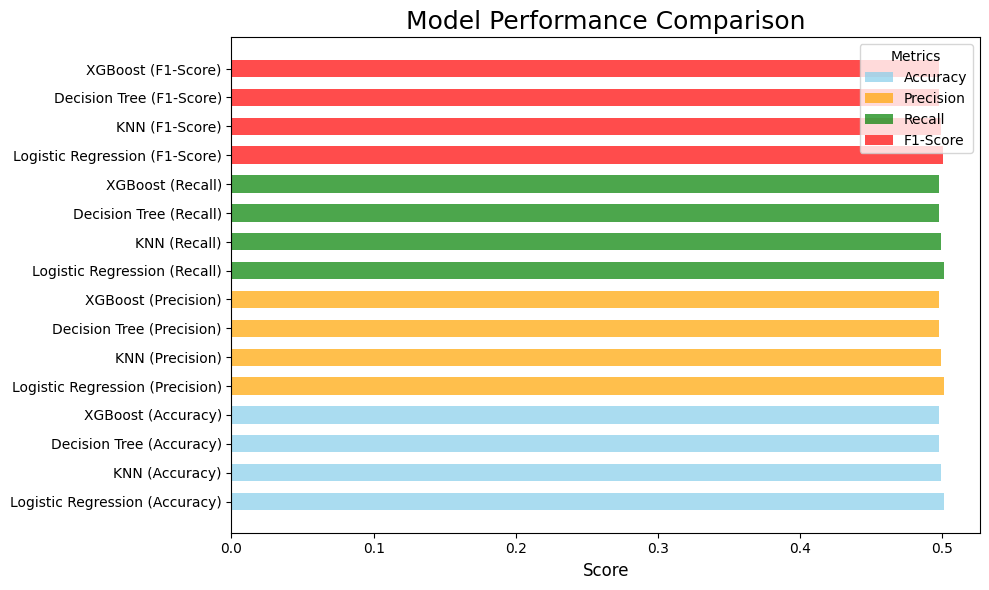


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.5013


In [31]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Simple NN
Accuracy       0.50058
Precision      0.25058
Recall         0.50058
F1-Score      0.333978
Name: 0, dtype: object


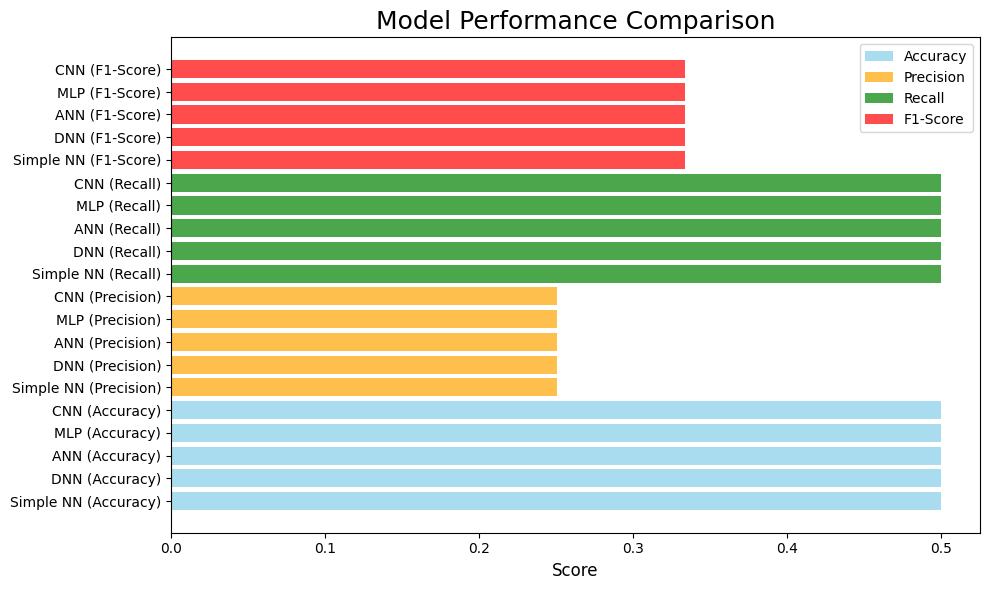


Optimal Model based on Accuracy: Simple NN with Accuracy = 0.5006


In [32]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

## Interpretation of results

### 1. Although the accuracy is around 50%, the model is not suitable for predicting the data because the predictions are highly biased.
### 2. The reason I can't evaluate the predictions is that, as shown in the correlation graph, there is a lack of correlation. <br><br>

## Improvement Plan
### 1. Ensemble Model
### - Combine multiple models to improve overall performance by reducing bias and variance. <br>
### 2. Grid Search & Random Search
### - Implement hyperparameter tuning techniques such as Grid Search and Random Search to find the optimal parameters for the model. <br>
### 3. Incorporate Highly Correlated Variables
### - Add highly correlated features that might improve the model's predictive power and overall performance. <br>
### 4. Adjust Deep Learning Model Parameters
### - Tune parameters like the number of epochs and batch size to optimize the deep learning model's training process and avoid overfitting or underfitting. 

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>